# 1. Introduction
This project aims to predict whether a travel insurance policyholder will submit an insurance claim based on customer demographics, trip characteristics, and insurance product information. Machine learning classification is employed due to the uncertain and multivariate nature of claim occurrences, which cannot be effectively addressed using rule-based systems.

# 2. Background
Travel insurance is a type of insurance that provides protection as long as we travel both domestically and abroad. Several countries have even required travelers to have travel insurance, for example, countries in Europe and America. The amount of premium depends on the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in travel insurance wants to know the policyholder who will submit an insurance claim for coverage. Policyholder data at insurance companies is historical data consisting of destinations, insurance products, and so on.

In the Travel Insurance dataset, the features include:
1. **Agency**: Name of agency.
2. **Agency Type**: Type of travel insurance agencies.
3. **Distribution Channel**: Channel of travel insurance agencies.
4. **Product Name**: Name of the travel insurance products.
5. **Gender**: Gender of insured.
6. **Duration**: Duration of travel.
7. **Destination**: Destination of travel.
8. **Net Sales**: Amount of sales of travel insurance policies.
9. **Commission (in value)**: Commission received for travel insurance agency.
10. **Age**: Age of insured.
11. **Claim**: Claim status.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data_travel_insurance.csv')

# 3. Data Understanding
## 3.1 Dataset Overview

In [2]:
# Overview
print("Shape (Row, Column):", df.shape)
display(df.head())

Shape (Row, Column): (44328, 11)


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [3]:
# Basic Descriptive Summary
display(df.describe(), df.describe(include='object'))

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


In [4]:
# Column Summary (dtype, missing count, missing %, unique)
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'n_missing': df.isna().sum(),
    'n_missing(%)': (df.isna().mean()*100).round(2),
    'n_unique': df.nunique(dropna=False)
})
display(summary.sort_values('n_missing(%)', ascending=False))

,dtype,n_missing,n_missing(%),n_unique
Gender,object,31647,71.39,3
Agency Type,object,0,0.00,2
Agency,object,0,0.00,16
Distribution Channel,object,0,0.00,2
Product Name,object,0,0.00,26
Duration,int64,0,0.00,437
Destination,object,0,0.00,138
Net Sales,float64,0,0.00,1006
Commision (in value),float64,0,0.00,915
Age,int64,0,0.00,89


## 3.2 Target Variable (Claim)

In [5]:
# Target Variable
print("Target Distribution (Claim):")
display(df['Claim'].value_counts(dropna=False))
display((df['Claim'].value_counts(normalize=True)*100).round(2))

Target Distribution (Claim):


Claim
No     43651
Yes      677
Name: count, dtype: int64

Claim
No     98.47
Yes     1.53
Name: proportion, dtype: float64

## 3.3 Key Findings
The dataset contains **44,328 transactional records** for a travel insurance company, with 11 features. It details the specifics of the insurance policy sold and the characteristics of the policyholder. Key findings:
* Target Variable (`Claim`): It is a binary classification target (Yes/No). The data is **highly imbalanced**, with only about **1.5%** of records being "Yes" (677 claims vs 43,651 no claims).
* `Gender`: Has significant missing values (**71% missing**).
* `Age`: The average age is around 40, but there are outliers as high as 118 years, which are likely data errors.
* `Net Sales`: Represents the policy price. There are **483 records with negative sales**, which likely correspond to refunds or cancellations rather than data errors.
* `Duration`: The length of the trip. Some outliers (e.g. 4881 days), but there are 2 records with negative duration (-1) which are likely data errors.
* `Destination`: There are 138 unique destinations, with Singapore being the most frequent.
* **Agency Info**: There are 16 unique agencies and 26 different insurance products.

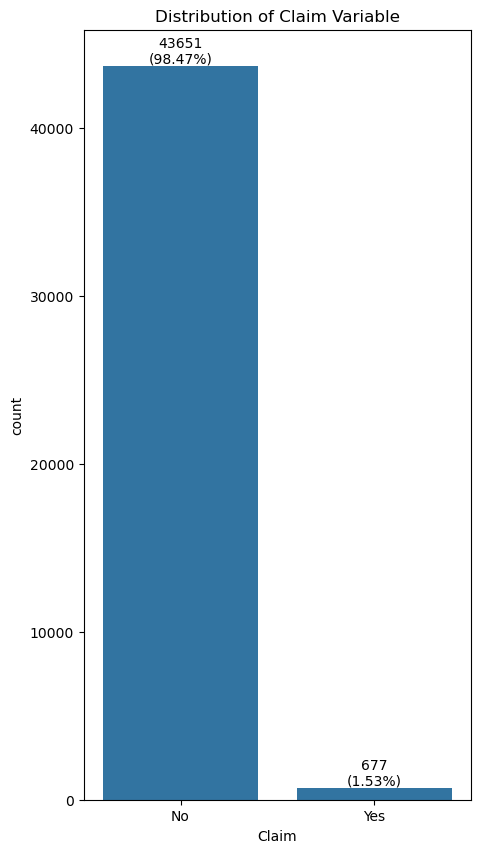

In [6]:
# Bar Chart for Claim vs No Claim
plt.figure(figsize=(5,10))
ax = sns.countplot(x='Claim', data=df)
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height()/total
    ax.annotate(f'{int(p.get_height())}\n({percentage:.2f}%)',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom'
                )

plt.title('Distribution of Claim Variable')
plt.show()

# 4. Business Problem
**Claim Prediction (Risk Assessment)**\
**Problem**\
Can we predict whether a customer/policyholder will submit an insurance claim?

Claims depend on many interacting factors, with the relationships are probabilistic, so rule-based logic is fragile and cannot reliably identify claim occurences. With the outcome (Claim) uncertain, multiple categorical and numerical features, historical data, and patterns that can be learned and generalized, Machine Learning is appropriate and is the exact type of problem ML was designed for.

**Business Value**
* Support risk-based review decisions
* Improve early identification of high-risk profiles
* Assist underwriting prioritization
* Provide data-driven insights for risk segmentation

# 5. Data Cleaning
The data cleaning process aims to address invalid, inconsistent, and unreliable values while preserving business-meaningful information. Decisions were made based on logical validity and domain plausibility rather than purely statistical criteria.

In [7]:
# Making a copy of dataframe
df_copy = df.copy()

## 5.1 Missing Values

In [8]:
# Checking for any missing value
df_copy.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [9]:
# Filling missing value with Unknown category
df_copy['Gender'] = df_copy['Gender'].fillna('Unknown')

# Rows with gender of missing values
print(f"Rows with missing gender: {df_copy['Gender'].isna().sum()}")


Rows with missing gender: 0


`Gender` is the only feature with missing value but it's at staggering numbers of **~71%**. Gender may influence travel behavior and claim risk. Since removing these records would result in significant information loss, these missing values are encoded as a separate `"Unknown"` category.

## 5.2 Invalid Values
### Duration

In [10]:
# Checking for rows with negative and more than 4000 days duration
display(df_copy[(df_copy['Duration'] < 0) | (df_copy['Duration'] > 4000)])

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,Unknown,4736,SINGAPORE,0.32,0.09,48,No
4678,SSI,Airlines,Online,Ticket Protector,Unknown,4857,SINGAPORE,0.32,0.09,48,No
10172,SSI,Airlines,Online,Ticket Protector,Unknown,4815,SINGAPORE,0.32,0.09,48,No
12140,SSI,Airlines,Online,Ticket Protector,Unknown,4652,SINGAPORE,0.32,0.09,48,No
19497,SSI,Airlines,Online,Ticket Protector,Unknown,4881,SINGAPORE,0.13,0.04,48,No
20038,SSI,Airlines,Online,Ticket Protector,Unknown,4844,SINGAPORE,0.32,0.09,48,No
22215,SSI,Airlines,Online,Ticket Protector,Unknown,4580,SINGAPORE,0.32,0.09,48,No
25606,SSI,Airlines,Online,Ticket Protector,Unknown,4685,SINGAPORE,0.32,0.09,48,No
26228,JZI,Airlines,Online,Basic Plan,Unknown,-1,MALAYSIA,18.00,6.30,118,No
26494,JZI,Airlines,Online,Basic Plan,Unknown,-1,BRUNEI DARUSSALAM,18.00,6.30,118,No


In [11]:
# Convert rows with duration of negative or more than 4000 days into missing value
df_copy.loc[(df_copy['Duration'] < 0) | (df_copy['Duration'] > 4000), 'Duration'] = np.nan

# Rows with duration of missing values
print(f"Rows with missing duration: {df_copy['Duration'].isna().sum()}")

# Description of duration
df_copy['Duration'].describe()

Rows with missing duration: 15


count    44313.000000
mean        48.043057
std         73.410190
min          0.000000
25%          9.000000
50%         22.000000
75%         53.000000
max        740.000000
Name: Duration, dtype: float64

Duration values that were logically invalid (negative or exceeding 4000 days) were treated as missing to avoid introducing incorrect assumptions while preserving the remaining valid information in the affected records.

### Age

In [12]:
# Checking for age equal or more than 100
df_copy[(df_copy['Age'] >= 100)]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,M,7.0,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,Unknown,16.0,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,F,12.0,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,M,6.0,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,F,76.0,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...,...
44089,JWT,Airlines,Online,Value Plan,M,42.0,INDIA,31.0,12.40,118,No
44140,JWT,Airlines,Online,Value Plan,M,84.0,INDIA,93.0,37.20,118,No
44150,JWT,Airlines,Online,Value Plan,M,5.0,INDIA,39.0,15.60,118,No
44160,JWT,Airlines,Online,Value Plan,M,0.0,INDIA,31.0,12.40,118,No


In [13]:
# Convert rows with age of equal or more than 100 to missing value
df_copy.loc[df_copy['Age'] >= 100, 'Age'] = np.nan

# Rows with age of missing values
print(f"Rows with missing age: {df_copy['Age'].isna().sum()}")

# Description of Age
df_copy['Age'].describe()

Rows with missing age: 676


count    43652.000000
mean        38.716531
std         10.094275
min          0.000000
25%         35.000000
50%         36.000000
75%         42.000000
max         88.000000
Name: Age, dtype: float64

In [14]:
# Checking for age equal or more than 100
print(f"Rows with age more than 100: {len(df_copy[df_copy['Age'] >= 100])}")

Rows with age more than 100: 0


The dataset contains a large number of records with an age value of equal or more than 100 years (to be exact, they were all 118 years). While extreme ages are theoretically possible, the frequency of this value strongly suggests a systematic data entry issue. To prevent misleading the model, age values equal or more than 100 were treated as missing.

Age values below 18, including teenage ages, were retained as they represent valid dependent travelers. Age values of 0 were also retained, as they may correspond to newborn dependents.

## 5.3 Cleaning Summary
After data cleaning, invalid values were considered to be missing values, and business-plausible extremes were preserved. Remaining missing values and skewed distributions are addressed in the data preprocessing stage.

In [15]:
# Cleaned dataframe
df_cleaned = df_copy.copy()

In [16]:
# Checking missing value
df_cleaned.isna().sum()

Agency                    0
Agency Type               0
Distribution Channel      0
Product Name              0
Gender                    0
Duration                 15
Destination               0
Net Sales                 0
Commision (in value)      0
Age                     676
Claim                     0
dtype: int64

# 6. Feature Engineering and Feature Selection
This section improves on existing data by creating new better feature. It transforms raw variables into features that better represent risk. Feature engineering focused on stabilizing learning and reducing sparsity rather than aggressively transforming the data.
## 6.1 `Has_Commission` Flag
A binary commission indicator is able to capture potential differences in risk between commission-based and non-commission-based products.

In [17]:
df_cleaned['Has_Commission'] = (df_cleaned['Commision (in value)'] > 0).astype(int)
df_cleaned.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Has_Commission
0,C2B,Airlines,Online,Annual Silver Plan,F,365.0,SINGAPORE,216.0,54.0,57.0,No,1
1,EPX,Travel Agency,Online,Cancellation Plan,Unknown,4.0,MALAYSIA,10.0,0.0,33.0,No,0
2,JZI,Airlines,Online,Basic Plan,M,19.0,INDIA,22.0,7.7,26.0,No,1
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,20.0,UNITED STATES,112.0,0.0,59.0,No,0
4,C2B,Airlines,Online,Bronze Plan,M,8.0,SINGAPORE,16.0,4.0,28.0,No,1


## 6.2 Rare Destination Grouping
In total, there are 138 destinations but some only appear a few times. One-Hot encoding would introduce a lot of noise. For these rare destinations, they can be grouped into `"Other"`. This is done to reduce sparsity and improve model stability while preserving information for frequently traveled destinations.

In [18]:
# Counting destination
dest_counts = df_cleaned['Destination'].value_counts()

# Variable for rare destination, those with less than adjustable threshold visits
rare_dests_thresh = 100
rare_dests = dest_counts[dest_counts < rare_dests_thresh].index

df_cleaned['Destination_Grouped'] = df_cleaned['Destination'].replace(rare_dests, 'Other')
df_cleaned['Destination_Grouped'].value_counts()

Destination_Grouped
SINGAPORE                           9267
MALAYSIA                            4139
THAILAND                            4122
CHINA                               3396
AUSTRALIA                           2578
INDONESIA                           2384
PHILIPPINES                         1758
HONG KONG                           1743
UNITED STATES                       1743
Other                               1672
INDIA                               1572
JAPAN                               1451
VIET NAM                            1194
KOREA, REPUBLIC OF                  1030
UNITED KINGDOM                       906
TAIWAN, PROVINCE OF CHINA            758
MYANMAR                              585
BRUNEI DARUSSALAM                    550
NEW ZEALAND                          372
CANADA                               371
CAMBODIA                             344
FRANCE                               341
ITALY                                316
GERMANY                              

Rare destinations with fewer than 100 observations were grouped into an “Other” category to mitigate high cardinality and unreliable estimates.

## 6.3 Duration Categories
Duration_Category feature is added, rather than logarithmic transformation. This approach reflects the assumption that insurance risk changes across duration thresholds rather than increasing smoothly, and improves the interpretability of the model.

In [19]:
df_cleaned['Duration_Category'] = pd.cut(
    df_cleaned['Duration'],
    bins=[-1, 7, 30, 180, 365, df_cleaned['Duration'].max()],
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

Travel duration was discretized into exposure-based categories to reflect meaningful trip lengths and reduce sensitivity to outliers.

# 7. Data Preprocessing
After data cleaning, the dataset still contains missing values, skewed distributions, categorical variables, and class imbalance. Data preprocessing is required to transform the cleaned data into a format suitable for machine learning models while minimizing bias and information loss.

## 7.1 Train-Test Split with Stratification
Splits the data into training set and test set. Due to imbalanced data (`Claim` **~1.5%**), the split must use stratification to ensure the same proportion of claim vs non-claim in both train and test sets.

In [20]:
from sklearn.model_selection import train_test_split


# Features every column except Claim
X = df_cleaned.drop('Claim', axis=1).copy()

# if Claim is Yes, it is categorized as 1, otherwise 0
y = np.where(df_cleaned['Claim'] == "Yes", 1, 0)

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2042, stratify = y)

## 7.2 Imputation
Imputation does replacing of missing values with reasonable estimates so models can train. Numeric variables use median imputation because median is robust and preserves distribution shape, while mean is sensitive to extreme values.

## 7.3 Encoding
Because most ML models in scikit-learn operate on numerical input and cannot interpret text labels directly, categorical variables must be encoded. Chosen encoding method is One-Hot Encoding because the variables are nominal (no order), avoids introducing artificial ordinality, and works well with linear and tree-based models.

## 7.4 Scaling
The numerical features have very different ranges:
* `Age`: Tens of years
* `Net Sales`: currency scale

Because of that the numerical features will be scaled with StandardScaler, which centers the data at mean = 0 and less sensitive than MinMax to extreme values

## 7.5 Class Imbalance
The dataset is imbalanced, with **~1.5% of records** are claims. A naive model could achieve 98.5% accuracy by predicting "No Claim" always. So, the model will use balanced class weight. This does not create syntethic data, preserves real data distribution, penalizes misclassification of minority class more heavily, and a simple and effective baseline.

## 7.6 Preprocessing Pipeline

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_features = [
    'Age',
    'Net Sales',
    'Commision (in value)',
    'Has_Commission',
    'Duration'
]

num_eng_features = [
    'Age',
    'Net Sales',
    'Commision (in value)',
    'Has_Commission'
]

cat_features = [
    'Gender',
    'Agency',
    'Agency Type',
    'Distribution Channel',
    'Product Name',
    'Destination'
]

cat_eng_features = [
    'Gender',
    'Agency',
    'Agency Type',
    'Distribution Channel',
    'Product Name',
    'Destination_Grouped',
    'Duration_Category'
]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

eng_preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_eng_features),
    ('cat', cat_pipeline, cat_eng_features)
])

# 8. Modeling and Evaluation

## 8.1 Modeling
### Models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Logistic Regression
LogReg_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=2042
)

# Random Forest
RF_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=2042,
    n_jobs=-1
)

# Gradient Boosting
GB_model = GradientBoostingClassifier(
    random_state=2042,
)

Logistic Regression is used as a baseline model due to its simplicity and interpretability. While it is used for binary classification, it assumes linear relationships and is sensitive to outliers which distort the estimation of the model coefficients. Tree-based models (Random Forest and Gradient Boosting) were evaluated to capture non-linear relationships and feature interactions commonly present in insurance claim data. They're also designed for categorical data and more robust against outliers.

### Pipeline

In [23]:
# preprocessing with original features
model_pipeline = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LogReg_model)
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RF_model)
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('model', GB_model)
    ])
}

# preprocessing with engineered features
model_eng_pipeline = {
    'Logistic Regression': Pipeline([
        ('preprocessor', eng_preprocessor),
        ('model', LogReg_model)
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', eng_preprocessor),
        ('model', RF_model)
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', eng_preprocessor),
        ('model', GB_model)
    ])
}

## 8.2 Evaluation
The aim of the model is to catch as many claims as possible. Because missing real claims (False Negative) is more costly than flagging false claims (False Positive), recall is more important than precision. So the model prioritizes recall to identify high-risk insurance policies, while keeping precision at an operationally acceptable level.

Due to severe class imbalance, ROC-AUC may present overly optimistic performance by under-penalizing false positives. Therefore, model comparison primarily relies on recall, F1-score, and Average Precision (PR-AUC), which better reflect the model’s ability to identify rare claim events. Also, Accuracy may result in misleading conclusion in imbalanced data, so Accuracy is not included.

### Model Comparison

In [24]:
# Metrics (Recall, Precision, F1-score, ROC AUC)
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, average_precision_score

# Original features
results = []

for model, pipe in model_pipeline.items():
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)               # default threshold (0.5)
    y_prob = pipe.predict_proba(X_test)[:, 1]   # probabilities

    results.append({
        'Model': model,
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Average Precision': average_precision_score(y_test, y_prob),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Recall,Precision,F1 Score,Average Precision,ROC AUC
0,Logistic Regression,0.688889,0.051839,0.096423,0.083720,0.807459
1,Random Forest,0.007407,0.058824,0.013158,0.037482,0.704819
2,Gradient Boosting,0.000000,0.000000,0.000000,0.086107,0.832147


In [25]:
# Engineered features
results = []

for model, pipe in model_eng_pipeline.items():
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)               # default threshold (0.5)
    y_prob = pipe.predict_proba(X_test)[:, 1]   # probabilities

    results.append({
        'Model': model,
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Average Precision': average_precision_score(y_test, y_prob),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Recall,Precision,F1 Score,Average Precision,ROC AUC
0,Logistic Regression,0.688889,0.050543,0.094177,0.085577,0.812318
1,Random Forest,0.037037,0.027174,0.031348,0.029424,0.640041
2,Gradient Boosting,0.000000,0.000000,0.000000,0.076568,0.825033


Model comparison revealed that Logistic Regression achieved substantially higher recall compared to tree-based models, indicating a superior ability to identify claim cases under severe class imbalance. Although Random Forest and Gradient Boosting demonstrated reasonable ranking performance, their default classification behavior was overly conservative, resulting in very low recall. Given the business priority of minimizing missed claims, Logistic Regression appears to be the most suitable model at this stage.

Feature engineering was applied to incorporate domain knowledge while preserving model performance. Although recall remained unchanged and F1-score decreased slightly, improvements in ranking-based metrics and interpretability justified the use of engineered features.

### Experimenting on Threshold Tuning for Random Forest and Gradient Boosting

In [26]:
# Individual Pipeline for Random Forest and Gradient Boosting

# Random Forest
RF_pipeline = model_eng_pipeline['Random Forest']
RF_pipeline.fit(X_train, y_train)

y_prob_RF = RF_pipeline.predict_proba(X_test)[:, 1]

# Gradient Boosting
GB_pipeline = model_eng_pipeline['Gradient Boosting']
GB_pipeline.fit(X_train, y_train)

y_prob_GB = GB_pipeline.predict_proba(X_test)[:, 1]

In [27]:
from sklearn.metrics import precision_recall_curve
# Precision-Recall Curve 

# Random Forest
RF_precision, RF_recall, RF_thresholds = precision_recall_curve(y_test, y_prob_RF)

# Gradient Boosting
GB_precision, GB_recall, GB_thresholds = precision_recall_curve(y_test, y_prob_GB)

In [28]:
# Tuning Goal: Catch at least 60% of claims
# Random Forest
RF_idx = np.where(RF_recall >= 0.6)[0][0]
RF_thresh_60 = RF_thresholds[RF_idx]
print(f"threshold for Random Forest: {RF_thresh_60}")

# Gradient Boosting
GB_idx = np.where(GB_recall >= 0.6)[0][0]
GB_thresh_60 = GB_thresholds[GB_idx]
print(f"threshold for Gradient Boosting: {GB_thresh_60}")


threshold for Random Forest: 0.0
threshold for Gradient Boosting: 0.0008081833267704023


In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score

y_pred_RF_custom = (y_prob_RF >= RF_thresh_60).astype(int)

print("--- Random Forest ---")
print("RF Recall:", recall_score(y_test, y_pred_RF_custom))
print("RF Precision:", precision_score(y_test, y_pred_RF_custom))
print("RF F1:", f1_score(y_test, y_pred_RF_custom))

y_pred_GB_custom = (y_prob_GB >= GB_thresh_60).astype(int)

print("\n--- Gradient Boosting ---")
print("GB Recall:", recall_score(y_test, y_pred_GB_custom))
print("GB Precision:", precision_score(y_test, y_pred_GB_custom))
print("GB F1:", f1_score(y_test, y_pred_GB_custom))

--- Random Forest ---
RF Recall: 1.0
RF Precision: 0.015226708775095871
RF F1: 0.02999666703699589

--- Gradient Boosting ---
GB Recall: 1.0
GB Precision: 0.015226708775095871
GB F1: 0.02999666703699589


Threshold tuning revealed that Random Forest and Gradient Boosting required near-zero decision thresholds to achieve acceptable recall, resulting in nearly all policies being classified as high risk. This indicates poor probability separation for claim detection. In contrast, Logistic Regression achieved high recall at a meaningful threshold, making it more suitable for operational use. Henceforth, Logistic Regression is the selected final model.

### Stratified K-Fold Cross-Validation
To ensure robustness under class imbalance, the selected model was further validated using Stratified K-Fold cross-validation on the training data. This approach preserves class distribution in each fold and provides a more reliable estimate of model performance.

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=2042
)


cv_recall = cross_val_score(
    model_eng_pipeline['Logistic Regression'],
    X_train,
    y_train,
    cv=skf,
    scoring='recall'
    )

cv_recall

array([0.7706422 , 0.69724771, 0.66666667, 0.75      , 0.69444444])

In [31]:
print(f"Cross-Val Score: {cv_recall.mean()} +- {cv_recall.std()}")

Cross-Val Score: 0.7158002038735983 +- 0.03844902832692252


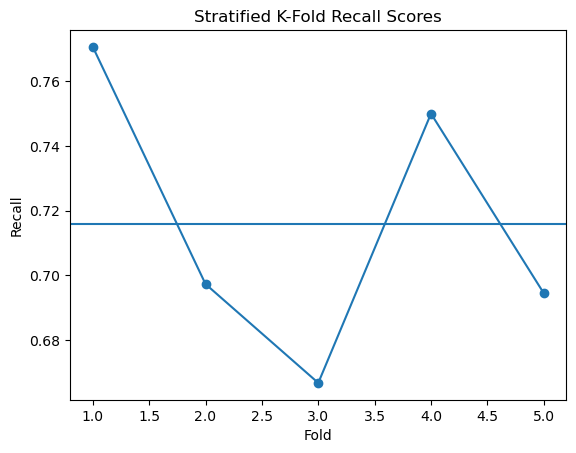

In [32]:
# Visualize
plt.figure()
plt.plot(range(1, len(cv_recall)+1), cv_recall, marker='o')
plt.axhline(cv_recall.mean())
plt.title("Stratified K-Fold Recall Scores")
plt.xlabel("Fold")
plt.ylabel("Recall")
plt.show()

Logistic Regression achieved a mean recall of 0.72 with low variance across folds, indicating stable and consistent claim detection. Tree-based models exhibited significantly lower recall during cross-validation, reinforcing their limited suitability for this task.

### Precision-Recall Curve (Logistic Regression)

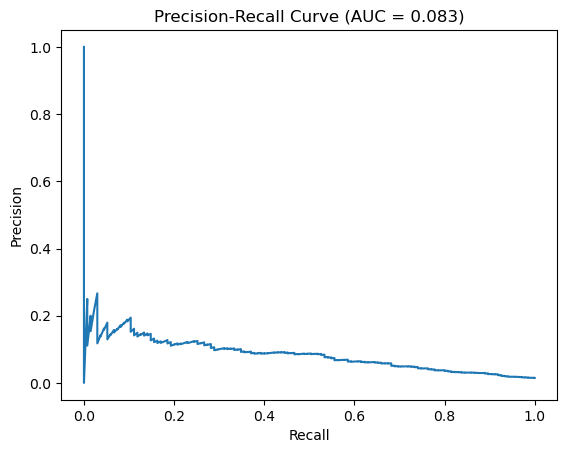

In [33]:
from sklearn.metrics import auc

# Fit the final pipeline
LR_pipeline = model_eng_pipeline['Logistic Regression']
LR_pipeline.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_prob_LR = LR_pipeline.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
LR_precision, LR_recall, LR_thresholds = precision_recall_curve(y_test, y_prob_LR)

# Calculate PR-AUC
LR_pr_auc = auc(LR_recall, LR_precision)

# Plot
plt.figure()
plt.plot(LR_recall, LR_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUC = {LR_pr_auc:.3f})")
plt.show()

### Model Interpretation

In [34]:
# Extract the trained model
LR_final_model = LR_pipeline.named_steps['model']

# Get feature names after preprocessing
LR_final_model_features = LR_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Build coefficient table
coef_df = pd.DataFrame({
    'Feature': LR_final_model_features,
    'Coefficient': LR_final_model.coef_[0]
})

# Convert coefficients to odds ratios
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

# Sort the table by importance
coef_df = coef_df.sort_values(
    by='Coefficient',
    key=abs,
    ascending=False
)

coef_df.head(15)

,Feature,Coefficient,Odds_Ratio
55,cat__Destination_Grouped_CAMBODIA,-2.513777,0.080962
81,cat__Destination_Grouped_UNITED ARAB EMIRATES,-2.487060,0.083154
71,cat__Destination_Grouped_NORWAY,-2.252497,0.105136
17,cat__Agency_KML,2.092840,8.107908
41,cat__Product Name_Individual Comprehensive Plan,-2.058201,0.127683
77,cat__Destination_Grouped_SRI LANKA,-2.041032,0.129895
8,cat__Agency_ART,-1.987861,0.136988
54,cat__Destination_Grouped_BRUNEI DARUSSALAM,-1.928970,0.145298
9,cat__Agency_C2B,1.862271,6.438341
48,cat__Product Name_Spouse or Parents Comprehens...,1.823831,6.195548


Model interpretation based on Logistic Regression coefficients reveals that destination, product type, and sales agency are the primary drivers of claim risk. Several destinations are associated with substantially lower claim odds, such as Cambodia, United Arab Emirates, and Norway, indicating geographic variation in historical claim behavior. Certain agencies exhibit significantly higher claim associations, likely reflecting differences in customer segmentation or product offerings rather than causal effects. Product-level features further demonstrate that claim likelihood varies across insurance plans, supporting the need for differentiated underwriting and pricing strategies. Overall, the model provides interpretable insights that align with domain expectations.

# Conclusion and Recommendation

## Conclusion
This project developed a machine learning model to predict the likelihood of travel insurance claims as a support tool for risk assessment. After data cleaning, feature engineering, and model comparison, Logistic Regression was selected due to its ability to consistently identify claim cases under severe class imbalance while remaining interpretable.

The final model achieved an average recall of approximately 0.72, meaning it successfully identified about 72% of claim cases, which directly supports the business objective of minimizing missed claims. Although precision remains low due to the rarity of claims, this outcome is expected for a risk screening task. By reducing missed claims, the model has the potential to lower unexpected claim payouts, improve underwriting effficiency, and support better capital allocation and risk segmentation. Even a modest reduction in missed claims could translate into meaningful cost savings, making the model valuable as part of a broader risk management workflow. Model interpretation indicates that destination, insurance product type, and sales agency are the primary factors associated with claim risk, aligning with domain expectations.

This project does not exist without its flaws. First, the dataset exhibits severe class imbalance, which constrains precision and limits fully automated use. Second, the model relies on policy-level attributes and lacks richer customer, behavioral, or medical information that could improve predictive power. Third, the model Logistic Regression assumes linear relationships and may not capture complex interactions. 

Overall, the model provides a measurable and interpretable solution to the defined business problem.

## Recommendations
The model should be used as a risk screening and decision-support tool to assist insurance teams in identifying policies that may require additional attention. Specifically, it can support:
* Prioritization of higher-risk policies for manual review by underwriting staff
* Risk-based pricing considerations
* Portfolio-level monitoring of claim exposure across destinations and products\
By improving early identification of potential claims, the model can help reduce unexpected claim losses and improve operational efficiency.

The model should not be used as a fully automated decision system. It is not suitable for:
* Automatically approving or rejecting claims
* Replacing human judgment in underwriting decisions
* Taking punitive actions against individual customers\
Human oversight remains necessary due to data limitations and low precision.

Future improvements may include:
* Incorporating customer history or behavioral features
* Applying cost-sensitive learning approaches
* Refining threshold selection based on operational capacity
* Exploring more complex models if interpretability constraints allow

# Saving Model with Pickle

In [35]:
import pickle

# Fit the final model
final_model = model_eng_pipeline['Logistic Regression']
final_model.fit(X_train, y_train)

# Save the model
with open("logistic_regression_claim_model.pkl", "wb") as f:
    pickle.dump(final_model, f)